In [467]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

sns.set_style('whitegrid',{'axes.grid':False})


In [468]:
t_train = pd.read_csv('train.csv')
t_test = pd.read_csv('test.csv')

In [469]:
t_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [470]:
t_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Richard, Mr. Emile",male,1601,B96 B98,S
freq,1,577,7,4,644


In [471]:
t_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [472]:
t_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [473]:
t_train.info()
print('_'*40)
t_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [474]:
#猜测仓位等级和获救率有关，头等舱更容易人、进行验证
t_train[['Pclass','Survived']].groupby('Pclass',as_index = False).mean().sort_values(by=
'Survived',ascending = False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [475]:
#猜测性别与获救率有关，女性更容易获救，进行验证
t_train[['Sex','Survived']].groupby('Sex',as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [476]:
#猜测是否有兄弟姐妹在船上与获救率有关，进行验证
t_train[['SibSp','Survived']].groupby('SibSp',as_index = False).mean().sort_values(
by = 'Survived',ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [477]:
#猜测子女个数在船上与获救率有关，进行验证
t_train[['Parch','Survived']].groupby('Parch',as_index = False).mean().sort_values(
by = 'Survived',ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [478]:
#图标绘制

<Figure size 2880x2160 with 0 Axes>

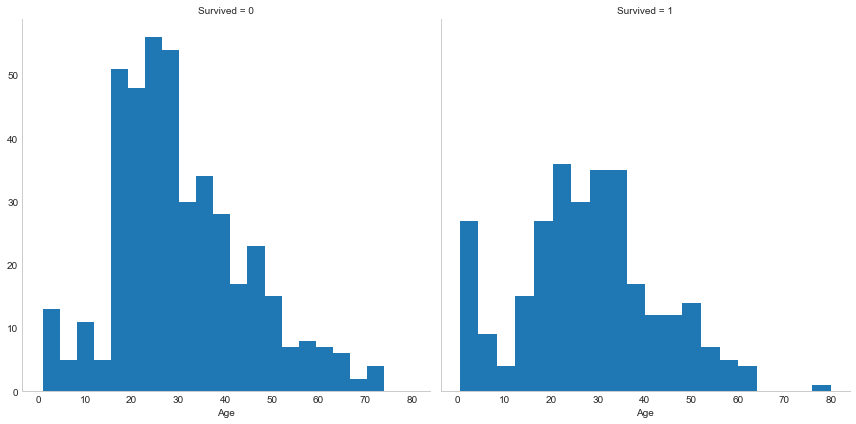

In [479]:
#猜测年龄与获救率之间的关系
plt.figure(figsize=(40,30)) 
g = sns.FacetGrid(t_train,col = 'Survived',size = 6,aspect = 1)
pp =g.map(plt.hist,'Age',bins=20)

#决定将年龄作为特征输入预测模型

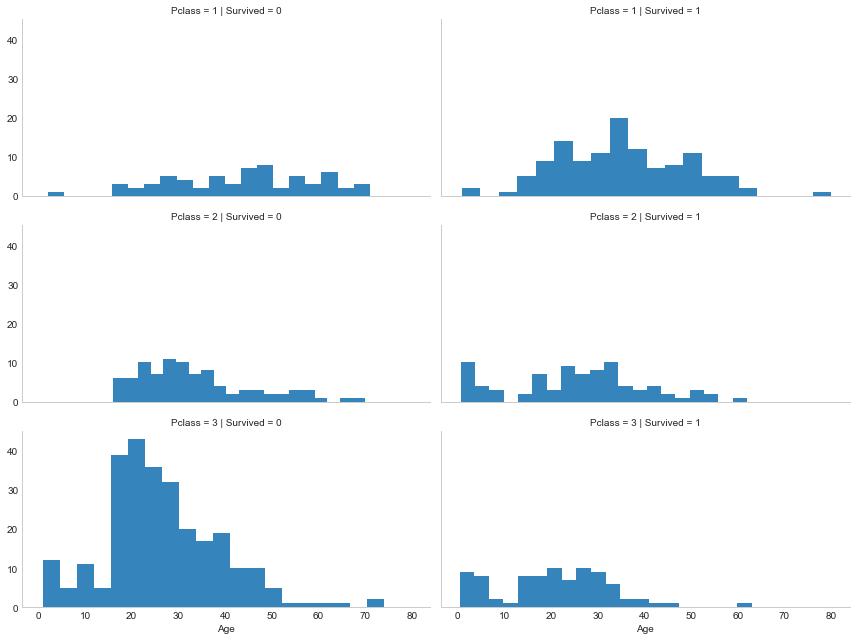

In [480]:
#验证舱位等级与获救率之间的关系，可以看出低等舱位的获救率很低
grid = sns.FacetGrid(t_train,col = 'Survived',row = 'Pclass',size = 3,aspect = 2)
grid.map(plt.hist,'Age',alpha = .9 ,bins = 20)

#决定将舱位等级作为特征输入预测模型

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


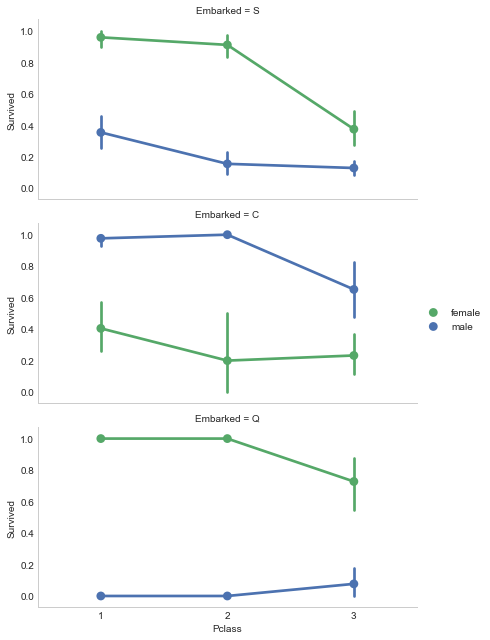

In [481]:
#显示登船处，舱位等级，性别与获救之间的关系
grid = sns.FacetGrid(t_train,row = 'Embarked',size = 3, aspect = 2)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep') #调色板样式
grid.add_legend()

#决定将性别和登船地作为特征输入预测模型

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


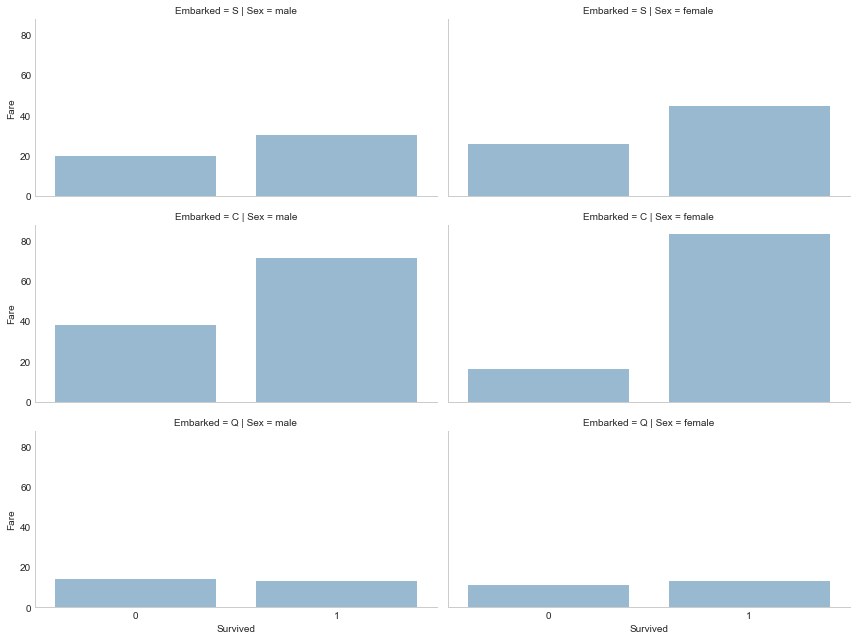

In [482]:
#推测船票价格与获救率之间的关系，发现船票价格高的人获救率更高
grid = sns.FacetGrid(t_train,col = 'Sex',row = 'Embarked',size = 3,aspect = 2)
grid.map(sns.barplot,'Survived','Fare',alpha = 0.5,ci = None)

#决定将船票价格纳入预测模型输入特征

In [483]:
#根据我们之前的决定，我们决定丢弃cabin列和ticket列，我们认为这两列对于预测模型没有帮助

print("before the drop off,")
print(f"the shape of the training set is {t_train.shape}")
print(f"the shape of the test set is {t_test.shape}")

t_train = t_train.drop(['Cabin','Ticket'],axis = 1)
t_test = t_test.drop(['Cabin','Ticket'],axis = 1)

print("\nAFTER the drop off,")
print(f"the shape of the training set is {t_train.shape}")
print(f"the shape of the test set is {t_test.shape}")


before the drop off,
the shape of the training set is (891, 12)
the shape of the test set is (418, 11)

AFTER the drop off,
the shape of the training set is (891, 10)
the shape of the test set is (418, 9)


In [484]:
#我们想把name列删除，但是感觉名字列里面的title有可能和生还率有关，因此我们提取name里面的title
#成立一个新的特征title

#使用正则表达式提取name列中“ . ”之前的字符串
t_train['Title'] = t_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
t_test['Title'] = t_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(t_train.Title,t_train.Sex)

#并且决定把title作为新的特征输入预测模型

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [485]:
#将title列整理一下，比如把一些少见的title统一换为rare
combine = [t_train,t_test]
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
t_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [486]:
#可以看出女性title获救的概率最高
t_train[['Title','Survived']].groupby('Title').mean().sort_values(by = 'Survived')

,Survived
Title,
Mr,0.156673
Rare,0.347826
Master,0.575000
Miss,0.702703
Mrs,0.793651


In [487]:
#对训练集和测试集title列进行独热编码
t_train = t_train.join(pd.get_dummies(t_train.Title))
t_test = t_test.join(pd.get_dummies(t_test.Title))


In [488]:
#现在可以将name和title列进行丢弃了
t_train = t_train.drop(['PassengerId','Title','Name'],axis = 1)
t_test = t_test.drop(['Title','Name'],axis =1)

t_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Master,Miss,Mr,Mrs,Rare
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,0
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,1,0,0,0
3,1,1,female,35.0,1,0,53.1000,S,0,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,0


In [489]:
#现在将embarked列也进行独热编码
t_train = t_train.join(pd.get_dummies(t_train.Embarked))
t_test = t_test.join(pd.get_dummies(t_test.Embarked))

In [490]:
#丢弃原始embarked列
t_train = t_train.drop(['Embarked'],axis = 1)
t_test = t_test.drop(['Embarked'],axis =1)

t_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Master,Miss,Mr,Mrs,Rare,C,Q,S
0,0,3,male,22.0,1,0,7.2500,0,0,1,0,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,0,0,0,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,0,1,0,0,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,0,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,0,0,1,0,0,0,0,1


In [491]:
#将SEX列数据进行二值化
t_train['Sex'] = [1 if i == 'female' else 0 for i in t_train['Sex'] ]
t_test['Sex'] = [1 if i == 'female' else 0 for i in t_test['Sex'] ]

t_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Master,Miss,Mr,Mrs,Rare,C,Q,S
0,0,3,0,22.0,1,0,7.2500,0,0,1,0,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,0,0,0,1,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,1,0,0,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,0,1,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1,0,0,0,0,1


In [492]:
#现在对各种缺失值进行补充,主要是age列
t_train.info()
#我们需要选择用哪种方式补充age的缺失值
#1.使用age的平均值的方差范围内随机生成一个值
#2.使用具有相同pclass和gender的中位数值，推荐
#3.结合上述两种方法
#1，3钟方法会为模型带来噪音，所以我们选择第二种

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Master      891 non-null uint8
Miss        891 non-null uint8
Mr          891 non-null uint8
Mrs         891 non-null uint8
Rare        891 non-null uint8
C           891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
dtypes: float64(2), int64(5), uint8(8)
memory usage: 55.8 KB


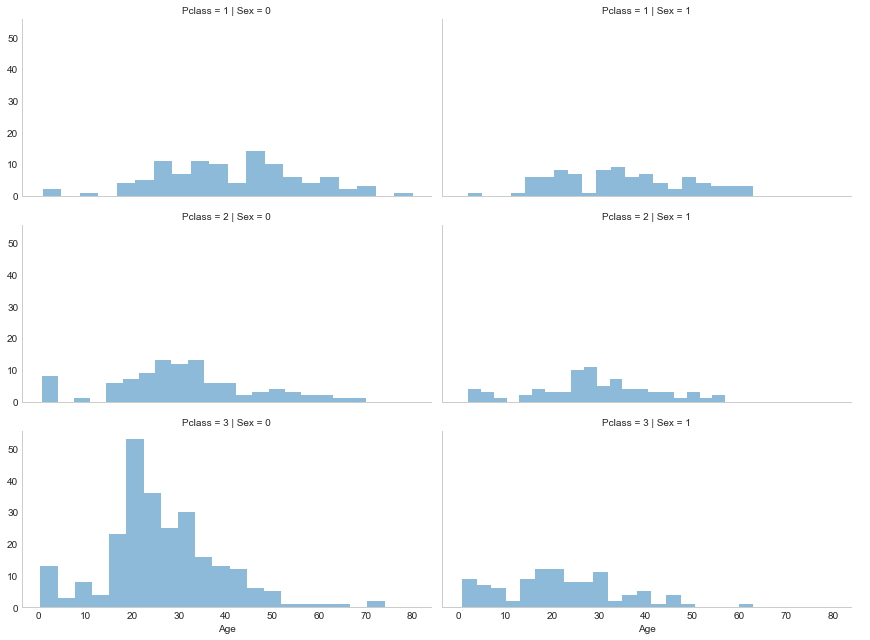

In [493]:
#可以看出性别和舱位等级和年龄大小是有关系的
grid = sns.FacetGrid(t_train,col = 'Sex',row = 'Pclass',size = 3,aspect = 2)
grid.map(plt.hist,'Age',alpha = 0.5,bins = 20)
grid.add_legend()

In [494]:
#根据舱位等级和性别分类统计两个数据集年龄的中位数
train_median_age = t_train[['Pclass','Sex','Age']].groupby(['Pclass','Sex']).median()
test_median_age = t_test[['Pclass','Sex','Age']].groupby(['Pclass','Sex']).median()
train_median_age

Age
Pclass Sex      
1      0    40.0
       1    35.0
2      0    30.0
       1    28.0
3      0    25.0
       1    21.5

In [495]:
#将测试集和训练集中AGE的nan替换成上表中对应的值
for i in range(1,4):
    for j in range(0,2):
        t_train.loc[(t_train_t.Pclass == i)&(t_train_t.Sex == j)&
                      (t_train.Age.isnull()),'Age'] = int(train_median_age.loc[i,j])
        
for i in range(1,4):
    for j in range(0,2):
        t_test.loc[(t_test.Pclass == i)&(t_test.Sex == j)&
                      (t_test.Age.isnull()),'Age'] = int(train_median_age.loc[i,j])
        
t_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Master,Miss,Mr,Mrs,Rare,C,Q,S
0,0,3,0,22.0,1,0,7.2500,0,0,1,0,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,0,0,0,1,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,1,0,0,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,0,1,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1,0,0,0,0,1


In [496]:
#对测试集中缺少的一个值使用平均值替换
t_test['Fare'].fillna(t_test['Fare'].mean(),inplace =True)

In [497]:
#现在我们来观察下年龄段与获救率之间的关系
t_train['Age_class'] = pd.cut(t_train['Age'],5)
t_train[['Age_class','Survived']].groupby('Age_class').mean()

,Survived
Age_class,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.336714
"(32.252, 48.168]",0.412844
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


In [498]:
#将age列转化为年龄段
combines = [t_train,t_test]

for dataset in combines:
    dataset.loc[(dataset.Age <= 16),'Age'] = 1
    dataset.loc[( (dataset.Age > 16) & (dataset.Age <= 32)),'Age'] = 2
    dataset.loc[( (dataset.Age > 32) & (dataset.Age <= 48)),'Age'] = 3
    dataset.loc[( (dataset.Age > 48) & (dataset.Age <= 64)),'Age'] = 4
    dataset.loc[( (dataset.Age > 64) & (dataset.Age <= 80)),'Age'] = 5
    


In [499]:
#然后最好将此年龄段特征转化为独热编码
t_train = t_train.join(pd.get_dummies(t_train.Age))
t_test = t_test.join(pd.get_dummies(t_test.Age))


In [ ]:
#之后去掉不需要的列
t_train = t_train.drop(['Age','Age_class'],axis = 1)
t_test = t_test.drop(['Age'],axis = 1)

t_train.head()

In [501]:
#我们现在检验拥有亲人在船上是否会影响获救率，构建一个新特征，判断此人是否独身
combines = [t_train,t_test]
for dataset in combines:
    dataset['is_alone']= 0
    dataset.loc[(dataset.SibSp == 0) & (dataset.Parch == 0),'is_alone'] = 1

In [502]:
t_train[['is_alone','Survived']].groupby('is_alone').mean()
#可以看出独身的获救率要小一些，决定将这个特征输入预测模型

,Survived
is_alone,
0,0.505650
1,0.303538


In [503]:
#丢弃原始的Sibsp和parch列
t_train = t_train.drop(['SibSp','Parch'],axis = 1)
t_test = t_test.drop(['SibSp','Parch'],axis = 1)

t_train.head()

,Survived,Pclass,Sex,Fare,Master,Miss,Mr,Mrs,Rare,C,Q,S,1.0,2.0,3.0,4.0,5.0,is_alone
0,0,3,0,7.2500,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1,1,1,1,71.2833,0,0,0,1,0,1,0,0,0,0,1,0,0,0
2,1,3,1,7.9250,0,1,0,0,0,0,0,1,0,1,0,0,0,1
3,1,1,1,53.1000,0,0,0,1,0,0,0,1,0,0,1,0,0,0
4,0,3,0,8.0500,0,0,1,0,0,0,0,1,0,0,1,0,0,1


In [504]:
# #使用sklearn对FARE进行标准化处理
from sklearn.preprocessing import StandardScaler
t_train['Fare'] = StandardScaler().fit_transform(t_train['Fare'].values.reshape((-1,1)))
t_test['Fare'] = StandardScaler().fit_transform(t_test['Fare'].values.reshape((-1,1)))


In [505]:
t_test.head()

,PassengerId,Pclass,Sex,Fare,Master,Miss,Mr,Mrs,Rare,C,Q,S,1.0,2.0,3.0,4.0,5.0,is_alone
0,892,3,0,-0.498407,0,0,1,0,0,0,1,0,0,0,1,0,0,1
1,893,3,1,-0.513274,0,0,0,1,0,0,0,1,0,0,1,0,0,0
2,894,2,0,-0.465088,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,895,3,0,-0.483466,0,0,1,0,0,0,0,1,0,1,0,0,0,1
4,896,3,1,-0.418471,0,0,0,1,0,0,0,1,0,1,0,0,0,0


## 数据的特征工程完成后，就可以准备模型进行训练了，我们准备使用多个不同的基础算法，来对比各预测模型的准确率

- 逻辑回归
- 支持向量机 SVM
- 决策树
- 随机森林
- 随机梯度下降
- 线性SVM
- KNN最近邻
- 朴素贝叶斯

In [507]:
#建立测试集和训练集
X_train = t_train.drop('Survived',axis = 1)
y_train = t_train['Survived']
X_test = t_test.drop('PassengerId',axis = 1)

In [525]:
#逻辑回归

logreg = LogisticRegression() #调用sklearn中的逻辑回归类
logreg.fit(X_train,y_train) #输入训练集进行训练
y_pred = logreg.predict(X_test) #使用测试集进行预测
acc_log = round(logreg.score(X_train,y_train) * 100,2) #输出训练集的准确率

print(f'The Accuracy using LogisticRegression is {acc_log}')

The Accuracy using LogisticRegression is 81.14


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [522]:
#现在可以检验一下各特征最终的权重如何

coeff = pd.DataFrame(t_train.columns.delete(0))
coeff.columns=['Feature']
coeff['Correlation'] = pd.Series(logreg.coef_[0])

coeff.sort_values(by = 'Correlation',ascending = False)

#可以看出性别，头衔中的master，Mrs，年纪小都和是否获救正相关
#而舱位等级和获救率是最大的负相关

,Feature,Correlation
1,Sex,1.664911
3,Master,1.499714
11,1,0.864989
6,Mrs,0.835406
12,2,0.625858
16,is_alone,0.553299
8,C,0.511333
9,Q,0.284778
4,Miss,0.160986
13,3,0.146300


In [526]:
#支持向量机 SVM

svc = SVC()
svc.fit(X_train,y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train,y_train) * 100, 2)

print(f'The Accuracy using SVM is {acc_svc}')


The Accuracy using LogisticRegression is 81.03


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [530]:
#KNN 最近邻

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

print(f'The Accuracy using KNN is {acc_knn}')

The Accuracy using KNN is 86.64


In [533]:
# 高斯朴素贝叶斯

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

print(f'The Accuracy using Gaussian Naive Bayes is {acc_gaussian}')

The Accuracy using Gaussian Naive Bayes is 78.9


In [535]:
#感知机 Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)


print(f'The Accuracy using Perceptron is {acc_perceptron}')

The Accuracy using Perceptron is 78.68


In [536]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)


print(f'The Accuracy using Perceptron is {acc_linear_svc}')

The Accuracy using Perceptron is 81.26


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [545]:
# 随机梯度下降 Stochastic Gradient Descent
#使用随机梯度下降无法保证每次收敛到同一个值，所以训练结果会有差异

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

print(f'The Accuracy using SGD is {acc_sgd}')

The Accuracy using SGD is 78.79


In [555]:
# Decision Tree决策树

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)


print(f'The Accuracy using Decision Tree is {acc_decision_tree}')

The Accuracy using Decision Tree is 93.94


In [558]:
# Random Forest 随机森林

random_forest = RandomForestClassifier(n_estimators=120)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

print(f'The Accuracy using Random Forest is {acc_random_forest}')

The Accuracy using Random Forest is 93.94


In [557]:
#将各种算法结果汇总
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,93.94
8,Decision Tree,93.94
1,KNN,86.64
7,Linear SVC,81.26
2,Logistic Regression,81.14
0,Support Vector Machines,81.03
4,Naive Bayes,78.90
6,Stochastic Gradient Decent,78.79
5,Perceptron,78.68


In [561]:
#所以我们决定使用随机森林，并提交结果

submission = pd.DataFrame({
    'PassengerId' : t_test['PassengerId'],
    'Survived':Y_pred
})

In [564]:
submission.to_csv('submission.csv',index = False)